# Problem Definition
Creating a model that will first find out wether a person is eligible for loan or not and if eligible than how much loan the user can obtain based on various factors such as the user’s income, education, etc.
## Data Source
https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
## Conditions that must match for this model
First of all, one cannot predict loan amount using regression models and 981 instances (combining training and testing set) with R2 Score greater than 0.44

Secondly, the dateset contains many missing values. So even if using imputer with different parameters for categorical and non-categorical data, ultimately data-set loses variability to some extent.

You do imputation, label encoding, one-hot encoding and standardization, and even hyper-parameters tuning in an effort to increase accuracy. But the performance benchmarks around R2 Score of 0.44

If still want to try to improve accuracy, you test different combinations of features. But still you get no significant improvement gains

Leaving regressors aside now and testing classification to somehow improve accuracy by categorizing loan amount by defining ranges, you get to see accuracy jumping to ~0.7 and F1 Score to ~0.6 with all the optimization techniques applied above.

It's tested and proven with all available ML models. So to better predict loan amount better increase the number of instances to more than 5000!

These are the some conditions that must match in this model


In [55]:
# Importing all the required modules for the mcahine learning project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


## Getting the Data ready for splitting


In [32]:
# we dont require to split data as it is already splitted for us 
#data = pd.read_excel("LoanPredData/")

## Accessing the data
Training set

In [82]:
# using readcsv as the data we have in exel is in the csv format
train_set = pd.read_csv("LoanPredData/train_u6lujuX_CVtuZ9i.csv")
xtrain_set_df_features = train_set_df.drop("Loan_Status",axis=1)
ytrain_set_df_target = train_set["Loan_Status"]

## Accesing the data
Test set

In [83]:
test_Set = pd.read_csv("LoanPredData/test_Y3wMUE5_7gLdaTN.csv")
xtest_Set_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [84]:
# size of the data we have
len(train_set_df),len(xtest_Set_df)

(614, 367)

# Exploratory Data Analysis( EDA)
1) What are we trying to solve

We are trying to create a ml model which will tell us how much loan the user can obtain using various attributes

2) Type of Data we have

We got the data both in numbers and strings also integers and strings mixed

3) Missing Values

We will be checking that int the code below

4) What are the outliers(Random samples too different from other or not)

Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations, will check that also

5) Add change or remove features to get the most out of our data




In [85]:
# Checking for missing values and yes we have too many of them
train_set.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
# checking for the data types of each columns
type_testing_list = []
for key,value in enumerate(train_set_df):
    x = type(train_set_df[value][6])
    type_testing_list.append(x)
type_testing_list

# # (other method)code for checking the length,dtype of each column
# for key,values in train_set_df.iteritems():
#     print(key,values)

[str,
 str,
 str,
 str,
 str,
 str,
 numpy.int64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 str,
 str]

### Now we will be checking wether the user is eligible for loan or not ,using classification models

Loan_Status
Y    422
N    192
dtype: int64

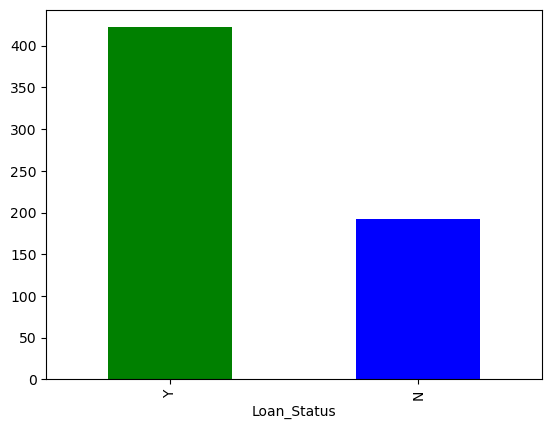

In [87]:
# first finding out how many of classes are there on our target variable
loan_status = train_set_df.value_counts("Loan_Status")
loan_status.plot(kind="bar",color=["Green","Blue"])
loan_status

In [88]:
train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [89]:
train_set_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Now we will be doing data study, like on what factors our model dependa

In [90]:
gender = train_set_df.value_counts("Gender")
gender

Gender
Male      489
Female    112
dtype: int64

### comparing how gender affects the target variable loan status

In [91]:
y = pd.crosstab(train_set_df["Gender"],train_set_df["Loan_Status"])
y

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<Axes: xlabel='Gender'>

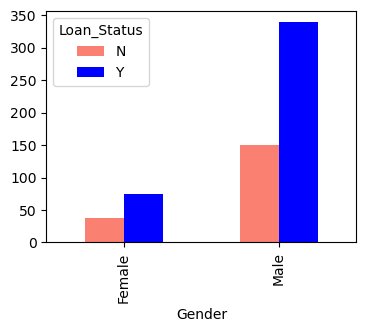

In [92]:
y.plot(kind="bar",color=["salmon","blue"],figsize=(4,3))

Damn, i guess we will have to first handle missing values

les go then,
### now we have two options 
first to remove all the rows with missing values but this can result in data loss and not working of the model correctly
second is to replace the missing values, lets try the first method 


In [93]:
# train_set_df.dropna(subset=["Gender","Married","Dependents","Self_Employed","LoanAmount","Loan_Amount_Term",
#                            "Credit_History"], inplace=True)
train_set_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

lmao there are no missing values in the target column,mb


In [94]:
# as we can see the data loss is too much, hence we will use the second option that is to 
# be rplacing values  now using imputer
len(train_set_df)

614

In [95]:
## replacing missing values using imputer
from sklearn.impute import SimpleImputer as SI
from sklearn.compose import ColumnTransformer as CT
# now here we will be filling string values with missing and integer values with mean
typ1 = SI(strategy="constant", fill_value="missing")
# Married_feature = SI(strategy="constant", fill_value="missing")
typ2 = SI(strategy="constant", fill_value="1")
# Self_emp_feature = SI(strategy="constant", fill_value="missing")
typ3 = SI(strategy="mean")
col1 = ["Loan_ID","Gender","Married","Self_Employed","ApplicantIncome","CoapplicantIncome","Property_Area"]
col2 = ["Dependents","Education","Credit_History"]
col3 = ["LoanAmount","Loan_Amount_Term"]
# creating an imputer , SOmething that will fill on the missing data
imputer = CT([("typ1",typ1,col1),
              ("typ2",typ2,col2),
              ("typ3",typ3,col3)])

# filled training set
filled_train_Set = imputer.fit_transform(xtrain_set_df_features)
len(filled_train_Set)

##filling the new data into a new dataframe 
missing_val_filled_train_set_df = pd.DataFrame(filled_train_Set,
                                              columns=["Loan_ID","Gender","Married","Self_Employed","ApplicantIncome",
                                                       "CoapplicantIncome","Property_Area",
                                                       "Dependents","Education","Credit_History","LoanAmount",
                                                       "Loan_Amount_Term"])

In [96]:
## NOW LETS CHECK WETHER WE FILLED THE MISSING VALUES OR NOT
missing_val_filled_train_set_df.isna().sum()
# train_set_df
# filled_train_Set

Loan_ID              0
Gender               0
Married              0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Property_Area        0
Dependents           0
Education            0
Credit_History       0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [97]:
# YES WE FILLED IT,  LETS CHECK THE LENGTH OF THE DATASET TO CHECK FOR DATA LOSS
len(missing_val_filled_train_set_df)
# NO DATA LOSS

614

## Doing the data conversion from other dtypes to int
so that it would be easier for our machine to work on it

In [98]:
missing_val_filled_train_set_df

,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Dependents,Education,Credit_History,LoanAmount,Loan_Amount_Term
0,LP001002,Male,No,No,5849,0.0,Urban,0,Graduate,1.0,146.412162,360.0
1,LP001003,Male,Yes,No,4583,1508.0,Rural,1,Graduate,1.0,128.0,360.0
2,LP001005,Male,Yes,Yes,3000,0.0,Urban,0,Graduate,1.0,66.0,360.0
3,LP001006,Male,Yes,No,2583,2358.0,Urban,0,Not Graduate,1.0,120.0,360.0
4,LP001008,Male,No,No,6000,0.0,Urban,0,Graduate,1.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,No,2900,0.0,Rural,0,Graduate,1.0,71.0,360.0
610,LP002979,Male,Yes,No,4106,0.0,Rural,3+,Graduate,1.0,40.0,180.0
611,LP002983,Male,Yes,No,8072,240.0,Urban,1,Graduate,1.0,253.0,360.0
612,LP002984,Male,Yes,No,7583,0.0,Urban,2,Graduate,1.0,187.0,360.0


In [101]:
## .astype wont work as data has missing values such as NaN
#train_set_df.astype("int")
## hence we will be usng one hot encoder, to encode all those values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#  0   Loan_ID            614 non-null    object 
#  1   Gender             601 non-null    object 
#  2   Married            611 non-null    object 
#  3   Dependents         599 non-null    object 
#  4   Education          614 non-null    object 
#  5   Self_Employed      582 non-null    object 
#  6   ApplicantIncome    614 non-null    int64  
#  7   CoapplicantIncome  614 non-null    float64
#  8   LoanAmount         592 non-null    float64
#  9   Loan_Amount_Term   600 non-null    float64
#  10  Credit_History     564 non-null    float64
#  11  Property_Area      614 non-null    object 
#  12  Loan_Status        614 non-null    object
missing_val_filled_train_set_df['CoapplicantIncome'] = missing_val_filled_train_set_df['CoapplicantIncome'].astype(str)
missing_val_filled_train_set_df['LoanAmount'] = missing_val_filled_train_set_df['LoanAmount'].astype(str)
missing_val_filled_train_set_df['Loan_Amount_Term'] = missing_val_filled_train_set_df['Loan_Amount_Term'].astype(str)
missing_val_filled_train_set_df['Credit_History'] = missing_val_filled_train_set_df['Credit_History'].astype(str)


feature_not_numbers = ["Loan_ID",
                        "Gender",
                        "Married",
                        "Dependents",
                        "Education",
                        "Self_Employed",
                        "CoapplicantIncome",
                        "LoanAmount",
                        "Loan_Amount_Term",
                        "Credit_History",
                        "Property_Area",
                        ]
one_hot = OneHotEncoder()
transformer = CT([("one_hot",one_hot,feature_not_numbers)],
                remainder="passthrough")
transforemd_data = transformer.fit_transform(missing_val_filled_train_set_df)
transforemd_train_Set_df = pd.DataFrame(transforemd_data)

#### these are our final transformed features from the training set
transforemd_train_Set_df

,0
0,"(0, 0)\t1.0\n (0, 615)\t1.0\n (0, 617)\t1...."
1,"(0, 1)\t1.0\n (0, 615)\t1.0\n (0, 618)\t1...."
2,"(0, 2)\t1.0\n (0, 615)\t1.0\n (0, 618)\t1...."
3,"(0, 3)\t1.0\n (0, 615)\t1.0\n (0, 618)\t1...."
4,"(0, 4)\t1.0\n (0, 615)\t1.0\n (0, 617)\t1...."
...,...
609,"(0, 609)\t1.0\n (0, 614)\t1.0\n (0, 617)\t..."
610,"(0, 610)\t1.0\n (0, 615)\t1.0\n (0, 618)\t..."
611,"(0, 611)\t1.0\n (0, 615)\t1.0\n (0, 618)\t..."
612,"(0, 612)\t1.0\n (0, 615)\t1.0\n (0, 618)\t..."


In [102]:
y_df = pd.DataFrame(ytrain_set_df_target)
y_df

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [103]:
target_not_number = ["Loan_Status"]
# transformer2 = CT([("one_hot",one_hot,target_not_number)],
#                  remainder="passthrough")
# ytransformed_target = transformer2.fit_transform(y_df)
# 

#### This is our final transformed target from our training set
# ytransformed_target_train_set_df
transformer = CT([("one_hot",one_hot,target_not_number)],
                remainder="passthrough")
ytransformed_target = transformer.fit_transform(y_df)
ytransformed_target_train_set_df = pd.DataFrame(ytransformed_target)
ytransformed_target_train_set_df

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
609,0.0,1.0
610,0.0,1.0
611,0.0,1.0
612,0.0,1.0


In [ ]:
# plt.scatter(missing_val_filled_train_set_df.ApplicantIncome[missing_val_filled_train_set_df.Loan_Status=="Y"],
#             missing_val_filled_train_set_df.Dependents[missing_val_filled_train_set_df.Loan_Status=="Y"],
#       #      train_set_df.Education[train_set_df.Loan_Status=="Y"],
#            c="salmon")

In [ ]:
# plt.scatter(missing_val_filled_train_set_df.ApplicantIncome[missing_val_filled_train_set_df.Loan_Status=="N"],
#             missing_val_filled_train_set_df.Dependents[missing_val_filled_train_set_df.Loan_Status=="N"],
#       #      train_set_df.Education[train_set_df.Loan_Status=="Y"],
#            c="salmon")


# Checking progress

 1) Data was successfully loaded
2) Handled the missing values
3) data converted to numerical format for the machine to understand easily
4) EDA was done on various attributes

# Now we will start evaluating our model

In [104]:
# lmao ded , we need to make the test dataset also work ready, damn
xtest_Set_df.isna().sum()
xtest_Set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [105]:
## replacing missing values using imputer
from sklearn.impute import SimpleImputer as SI
from sklearn.compose import ColumnTransformer as CT
# now here we will be filling string values with missing and integer values with mean
typ1 = SI(strategy="constant", fill_value="missing")
# Married_feature = SI(strategy="constant", fill_value="missing")
typ2 = SI(strategy="constant", fill_value="1")
# Self_emp_feature = SI(strategy="constant", fill_value="missing")
typ3 = SI(strategy="mean")
col1 = ["Loan_ID","Gender","Married","Self_Employed","ApplicantIncome","CoapplicantIncome","Property_Area"]
col2 = ["Dependents","Education","Credit_History"]
col3 = ["LoanAmount","Loan_Amount_Term"]
# creating an imputer , SOmething that will fill on the missing d"ata
imputer = CT([("typ1",typ1,col1),
              ("typ2",typ2,col2),
              ("typ3",typ3,col3)])

# filled training set
filled_test_Set = imputer.fit_transform(xtest_Set_df)
len(filled_test_Set)

##filling the new data into a new dataframe 
missing_val_filled_test_set_df = pd.DataFrame(filled_test_Set,
                                              columns=["Loan_ID","Gender","Married","Self_Employed","ApplicantIncome",
                                                       "CoapplicantIncome","Property_Area",
                                                       "Dependents","Education","Credit_History","LoanAmount",
                                                       "Loan_Amount_Term"])
missing_val_filled_test_set_df

missing_val_filled_test_set_df['CoapplicantIncome'] = missing_val_filled_test_set_df['CoapplicantIncome'].astype(str)
missing_val_filled_test_set_df['LoanAmount'] = missing_val_filled_test_set_df['LoanAmount'].astype(str)
missing_val_filled_test_set_df['Loan_Amount_Term'] = missing_val_filled_test_set_df['Loan_Amount_Term'].astype(str)
missing_val_filled_test_set_df['Credit_History'] = missing_val_filled_test_set_df['Credit_History'].astype(str)
########## converting to numerical format using one hot encoding
feature_not_numbers = ["Loan_ID",
                        "Gender",
                        "Married",
                        "Dependents",
                        "Education",
                        "Self_Employed",
                        "CoapplicantIncome",
                        "LoanAmount",
                        "Loan_Amount_Term",
                        "Credit_History",
                        "Property_Area",
                        ]
one_hot = OneHotEncoder()
transformer = CT([("one_hot",one_hot,feature_not_numbers)],
                remainder="passthrough")
transforemd_test_data = transformer.fit_transform(missing_val_filled_test_set_df)
transforemd_test_Set_df = pd.DataFrame(transforemd_data)

#### these are our final transformed features from the test set


In [106]:
x_train = filled_train_Set
y_train = ytransformed_target_train_set_df
x_test = filled_test_Set
# len(transforemd_train_Set_df)

# x_train_array = x_train.toarray().astype(np.float32)
# y_train_array = y_train.toarray().astype(np.float32)
# we also need to find the values of y_test to complete this code
# x_train[0] = pd.to_numeric(x_train[0], errors='coerce')
# y_train[0] = pd.to_numeric(y_train[0], errors='coerce')
x_test

,0
0,"(0, 0)\t1.0\n (0, 615)\t1.0\n (0, 617)\t1...."
1,"(0, 1)\t1.0\n (0, 615)\t1.0\n (0, 618)\t1...."
2,"(0, 2)\t1.0\n (0, 615)\t1.0\n (0, 618)\t1...."
3,"(0, 3)\t1.0\n (0, 615)\t1.0\n (0, 618)\t1...."
4,"(0, 4)\t1.0\n (0, 615)\t1.0\n (0, 617)\t1...."
...,...
609,"(0, 609)\t1.0\n (0, 614)\t1.0\n (0, 617)\t..."
610,"(0, 610)\t1.0\n (0, 615)\t1.0\n (0, 618)\t..."
611,"(0, 611)\t1.0\n (0, 615)\t1.0\n (0, 618)\t..."
612,"(0, 612)\t1.0\n (0, 615)\t1.0\n (0, 618)\t..."


# Training our model
1) Model Selection

using the sci-kit learn cheatsheet we are gonna use the following ml models for this project.
If one of them doesnt work we will try the other one

-> Linear SVC 
-> KNeighbors Classifier
-> SVC (Ensemble Classifier)

In [ ]:
transforemd_train_Set_df.info()

In [114]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from sklearn.model_selection import train_test_split
one_hot = OneHotEncoder()

# y_train_encoded = one_hot.fit_transform(y_train)
#### for using one hot encoder we always require 2d arrays data set, it wont work on 1d array dataset
# X_train,X_test,y_train,y_test = train_test_split(X_train_encoded,y_train,test_size=0.2)
model = RandomForestClassifier()
# fitted = model.fit(x_train,y_train)
# score = fitted.score(x_test,y_train)
# score
########################### Dimensionality reduction
################ PCA doesnt take sparse inputs
# from sklearn.decomposition import PCA

# def apply_pca(data, n_components):
#     pca = PCA(n_components=n_components)
#     reduced_data = pca.fit_transform(data)
#     return reduced_data

# # Example usage:
# n_components = 614  # Number of desired components
# train_reduced_features = apply_pca(x_train, n_components)
# test_reduced_features = apply_pca(x_test, n_components)

################## Feature Extraction techniques
########### require a pre defined feature extraction method
# def extract_features(data):
#     # Apply feature extraction techniques to convert data to fixed-length features
#     extracted_features = []
#     for datum in data:
#         # Apply feature extraction methods such as averaging, statistical measures, etc.
#         extracted_feature = extract_feature_from_data(datum)
#         extracted_features.append(extracted_feature)
#     return np.array(extracted_features)

# # Example usage:
# train_extracted_features = extract_features(X_train_encoded)
# test_extracted_features = extract_features(X_test_encoded)
# len(test_extracted_features)

####################### Susbset selection
############# not working
# def select_common_features(train_features, test_features):
#     common_features = set(train_features[0]).intersection(set(test_features[0]))
#     train_selected_features = []
#     test_selected_features = []
#     for train_feature, test_feature in zip(train_features, test_features):
#         selected_train_feature = [value for value in train_feature if value in common_features]
#         selected_test_feature = [value for value in test_feature if value in common_features]
#         if selected_train_feature:
#             train_selected_features.append(selected_train_feature)
#         else:
#             train_selected_features.append([])
#         if selected_test_feature:
#             test_selected_features.append(selected_test_feature)
#         else:
#             test_selected_features.append([])
#     return np.array(train_selected_features), np.array(test_selected_features)

# # Example usage:
# try:
#     train_selected_features, test_selected_features = select_common_features(x_train, x_test)
# except KeyError:
#     print("gg brother")
# len(x_test)
# len(x_train)
# train_selected_features, test_selected_features = select_common_features(X_train_encoded, X_test_encoded)
#################### padding last choice i guess
# import numpy as np

# def pad_features(features, max_length):
#     padded_features = []
#     for feature in features:
#         if len(feature) < max_length:
#             padded_feature = np.pad(feature, (0, max_length - len(feature)), 'constant')
#         else:
#             padded_feature = feature[:max_length]
#         padded_features.append(padded_feature)
#     return np.array(padded_features)

# # Example usage:
# max_length = 314  # Maximum length of feature vectors
# padded_train_features = pad_features(x_train, max_length)
# padded_test_features = pad_features(x_test, max_length)
# len(padded_train_features),len(padded_test_features)
# padded_test_features
from sklearn.preprocessing import LabelEncoder
label_enco = LabelEncoder()

x_train = filled_train_Set
y_train = ytransformed_target_train_set_df
x_test = filled_test_Set
# transformer = CT([("one_hot",one_hot,feature_not_numbers)],
#                 remainder="passthrough")
# X_train_encoded = transformer.fit_transform(missing_val_filled_train_set_df)
# X_test_encoded = transformer.fit_transform(transforemd_test_Set_df)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.4, random_state=42)
X_train_split.shape,X_val_split.shape, y_train_split.shape, y_val_split.shape
transformer = CT([("one_hot",one_hot,feature_not_numbers)],
                remainder="passthrough")
X_train_encoded = transformer.fit_transform(X_train_split)
X_test_encoded = transformer.fit_transform(missing_val_filled_test_set_df)
# y_train_encoded = one_hot.fit_transform(ytrain_set_df_target)
# x_train_array = X_train_encoded.toarray().astype(np.float32)
# # y_train_array = y_train.toarray().astype(np.float32)
# x_test_array = X_test_encoded.toarray().astype(np.float32)
# y_train_array = np.array(ytransformed_target_train_set_df)

model.fit(X_train_encoded,y_train_split)
y_test_preds = model.predict(x_test)

# model.score(X_test_encoded,y_test)
# for i in range(len(x_train_array)):
#     if x_test_array[i] == x_train_array[i]:
#         print(True)
#     else:
#         print(False)


ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [115]:
# model.fit(X_train_split,y_train_split)
# y_test_preds = model.predict(X_test_encoded)
# print(len(y_test_preds))

In [ ]:
len(x_train[1:368])


In [ ]:
missing_val_filled_train_set_df
ytrain_set_df_target



In [ ]:
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# Assuming you have a DataFrame with one-hot encoded features and target variable
missing_val_filled_train_set_df['CoapplicantIncome'] = missing_val_filled_train_set_df['CoapplicantIncome'].astype(str)
missing_val_filled_train_set_df['LoanAmount'] = missing_val_filled_train_set_df['LoanAmount'].astype(str)
missing_val_filled_train_set_df['Loan_Amount_Term'] = missing_val_filled_train_set_df['Loan_Amount_Term'].astype(str)
missing_val_filled_train_set_df['Credit_History'] = missing_val_filled_train_set_df['Credit_History'].astype(str)
X_train = missing_val_filled_train_set_df
y_train = ytrain_set_df_target
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the input features
X_train_encoded = encoder.fit_transform(X_train)

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)

# Create an instance of the classification algorithm
# we will be using all three models at once

model_dict = {'LinearSVC':LinearSVC(),
              'KNeighborsClassifier':KNeighborsClassifier(),
              'SVC':SVC()}
# now we will create a model that will fit and score on these models
def fit_and_Score(model, X_train_split, y_train_split, X_val_split, y_val_split):
    model_scores_list = []
    for key,classifier in model_dict.items():
        model_fit = classifier.fit(X_train_split,y_train_split)
        model_scores = model_fit.score(X_val_split,y_val_split)
        model_scores_list.append(model_scores)
    return model_scores_list

for classifier in model_dict:
    function_call = fit_and_Score(model = classifier,
                                  X_train_split = X_train_split,
                                  y_train_split = y_train_split,
                                  X_val_split = X_val_split,
                                  y_val_split = y_val_split)
Final_score = function_call
Final_score

# Fit the classifier to the training data
# # Evaluate the model
# accuracy = classifier.score(X_val_split, y_val_split)
# accuracy
# X_train_encoded

## Now we will do cross validation of the above data, to improve the accuracy

In [ ]:
result_dict = {}
for index,i in enumerate(Final_score):
    result_dict.update({list(model_dict)[index]:i})
result_dict
################################## starting cvs
from sklearn.model_selection import cross_val_score
np.random.seed(42)
# acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
# acc_score = np.mean(acc)
cvs_result_list = []
for key,classifier in model_dict.items():
    MODEL = classifier
    scoring_acc = cross_val_score(MODEL,X_train_encoded,y_train,cv = 5, scoring="accuracy")
    cross_validated_Score = np.mean(scoring_acc)
    cvs_result_list.append(cross_validated_Score)
cvs_result_list
y_preds = MODEL.predict_proba(X_test_encoded).reshape(-1,)
# test_probs = model.predict_proba(test_features).reshape(-1,)

## checking various metric results like classification report


In [ ]:
############### trying to use the fitted model on a different test dataset of different legnth as compared to the train datatset

# encoder = OneHotEncoder()
# np.random.seed(42)
# X_train_split = encoder.fit_transform(x_train)
# # y_train_split = encoder.fit_transform(y_train)
# y_train_split = ytrain_set_df_target
# X_test_split = encoder.fit_transform(missing_val_filled_test_set_df)
# clf = KNeighborsClassifier()
# clf = TruncatedSVD(100)
# Xpca = clf.fit_transform(X)
# from sklearn.decomposition import PCA

# def apply_pca(data, n_components):
#     pca = PCA(n_components=n_components)
#     reduced_data = pca.fit_transform(data)
#     return reduced_data

# # Example usage:
# n_components = 367 # Number of desired components
# train_reduced_features = apply_pca(X_train_split, n_components)
# test_reduced_features = apply_pca(X_test_split, n_components)
# fittedmodel = clf.fit(train_reduced_features,y_train_split)
# # 

# score = fittedmodel.score(test_reduced_features,y_train_split)
# score
########################################## trying to make the length of the test and train dataset equal
# from sklearn.decomposition import TruncatedSVD
# model = KNeighborsClassifier()
# encoder = OneHotEncoder()
# X_train_split = encoder.fit_transform(x_train)
# X_test_split = encoder.fit_transform(missing_val_filled_test_set_df)
# # clf = TruncatedSVD(100)
# # X2_train_split = clf.fit_transform(X_train_split)
# # X2_test_split = clf.fit_transform(X_test_split)

# # from sklearn.decomposition import PCA

# # def apply_pca(data, n_components):
# #     pca = PCA(n_components=n_components)
# #     reduced_data = pca.fit_transform(data)
# #     return reduced_data

# # # Example usage:
# # n_components = 10 # Number of desired components
# # train_reduced_features = apply_pca(X2_train_split, n_components)
# # test_reduced_features = apply_pca(X2_test_split, n_components)
# fittedmodel = model.fit(X_train_split,y_train)
# # 
# y_preds_test = fittedmodel.predict(X_test_split)
# # len(train_reduced_features),len(test_reduced_features)
# score = fittedmodel.score(X_test_split,y_preds_test)
# score

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(X_train_encoded,y_train))

### pos label important info
 if you have a binary classification problem where you are predicting whether an email is spam (positive class) or not spam (negative class), you can set the "pos_label" to 1 (spam) to calculate accuracy specifically for spam emails. This helps you understand how well your model performs in identifying spam emails while ignoring its performance on non-spam emails.

It's important to note that the "pos_label" parameter is not universally present in all accuracy calculation functions or libraries. Its availability may depend on the specific programming language or machine learning framework you are using.

In [ ]:
## importing all the basic tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## importing all the ml models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
## importing preprocessing tools
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
## Model Evaluating tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
## setting random seed
np.random.seed(42)
dataset = train_set
##experimentation with our dataset to know more about it

# x = dataset["target"].value_counts()

## splitting our data into train and test sets
x_train = missing_val_filled_train_set_df
y_train2 = ytrain_set_df_target
X_transformed = one_hot.fit_transform(x_train)

X = X_transformed
y = y_train2

x_test = missing_val_filled_test_set_df
## preprocrssing our data and handling the missing values
one_hot = OneHotEncoder()

## now we will be creating a function to use these models again and again 
# model_dict = {'LinearSVC':LinearSVC(),
#               "LogisticRegression":LogisticRegression(),
#               'KNeighborsClassifier':KNeighborsClassifier(),
#               'SVC':SVC(),
#               "RandomForestClassifier":RandomForestClassifier()}
model_dict = {'LinearSVC':LinearSVC(),
              'KNeighborsClassifier':KNeighborsClassifier(),
              'SVC':SVC()
              }
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
scoring_metrics = ["accuracy","precision","recall"]
def model_function(model,X_test,X_train,y_test,y_train):
    for key,classifier in model_dict.items():
        model_fit = classifier.fit(X_train,y_train)
        model_score = model_fit.score(X_test,y_test)
## Scoring using cross validation to get better results on accuracy,precision,recall use the following code
## instead of the code not commented
#     np.random.seed(42)
#     scoring_metrics = ["accuracy","precision","recall"]
#     for key,classifier in model_dict.items():
#         model_fit = classifier.fit(X_train,y_train)
#         for metric in scoring_metrics:
#             model_cvs = cross_val_score(classifier,X,y,cv=5,scoring=metric)
#             model_score = np.mean(model_cvs)
#             print(f'Model:{key} -- {metric} Score = {model_score}')
        accuracy_dict[key] = model_score
        y_preds = classifier.predict(X_test)
        
        
        
        precision_dict[key] = precision_score(y_true=y_test, y_pred=y_preds, pos_label="Y")
        recall_dict[key] = recall_score(y_true=y_test, y_pred=y_preds, pos_label="Y")
        model_compare_acc = pd.DataFrame(accuracy_dict,index = ["accuracy"])
        model_compare_pre = pd.DataFrame(precision_dict,index = ["precision"])       
        model_compare_rec = pd.DataFrame(recall_dict,index = ["recall_Score"])

    yield model_compare_acc
    yield model_compare_pre
    yield model_compare_rec
    ## keeping extra yields in case if we require more models to test
    yield ""
    yield ""
    yield ""
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

for classifier in model_dict:
    method_call = model_function(model = classifier,
                                 X_test = X_test,
                                 X_train = X_train,
                                 y_test = y_test,
                                 y_train = y_train)

for lim in range(len(model_dict)):
    print(method_call.__next__())
# plotting our results
# use the below commented code in case if there is error in plotting graphs
model_compare_acc = pd.DataFrame(accuracy_dict,index = ["accuracy"])
model_compare_pre = pd.DataFrame(precision_dict,index = ["precision"])       
model_compare_rec = pd.DataFrame(recall_dict,index = ["recall_Score"])
print("This Result is on a single test set without using corss validation")
##### Use the below code to print al the metrics ourside of the function
# print(f'{model_compare_acc}\n {model_compare_pre}\n {model_compare_rec}')
acc_plot = model_compare_acc.T.plot.bar()
pre_plot = model_compare_pre.T.plot.bar()
recall_plot = model_compare_rec.T.plot.bar()



## Result Analysis:
from the above result we can see that models, Logistic Regression, SVC, and RFC are giving the same results hence we will be discarding them also SVC is giving better results as compared to LinearSVC and KneighborsClassifier

# Hyperparameter Tuning
to improve SVC model

## 1) cross validation for svc


In [ ]:
import warnings
svc = SVC()
fittedmodel = svc.fit(X,y)
scoring_metrics = ["accuracy","roc_auc","f1"]
# Ignore warnings
warnings.filterwarnings("ignore")

# # Restore warnings
# warnings.filterwarnings("default")
for metric in scoring_metrics:
    cvs = cross_val_score(svc, X, y, cv=5, scoring=metric, verbose=1)
    cross_validated_score = np.mean(cvs)
    print(f'Model:SVC -- {metric} Score = {cross_validated_score}')

## 2) Random Search Cross Vaildation(RSCV)


In [ ]:
## Hyperparameter tuning using RSCV
# Creating a HP grid for SVC
np.random.seed(42)
SVC_grid = {"C":np.logspace(-4, 4 ,20),
            "break_ties":[5,5,10]}
rs_svc = RandomizedSearchCV(SVC(),
                           param_distributions=SVC_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_svc.fit(X_train,y_train)
rs_svc.best_params_


In [ ]:
#### using these params in above model fitting
import warnings
svc = SVC(break_ties=5, C=1.623776739188721)
fittedmodel = svc.fit(X,y)
scoring_metrics = ["accuracy","roc_auc","f1"]
# Ignore warnings
warnings.filterwarnings("ignore")

# # Restore warnings
# warnings.filterwarnings("default")
for metric in scoring_metrics:
    cvs = cross_val_score(svc, X, y, cv=5, scoring=metric, verbose=1)
    cross_validated_score = np.mean(cvs)
    print(f'Model:SVC -- {metric} Score = {cross_validated_score}')

In [ ]:
# pip install --upgrade scikit-learn


In [ ]:
################
from sklearn.metrics import RocCurveDisplay
classifier = SVC()
model_fit = classifier.fit(X_train,y_train)

y_preds = classifier.predict(X_test)  

# ## Plot ROC Curve and finding the AUC metric
# # AUC metric is generally written below the graph
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, roc_auc_score

# # Compute ROC curve
# fpr, tpr, thresholds = roc_auc_score(y_test, y_preds)

# # Plot ROC curve
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()
## Confusion matrix
# seaborn heat map
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
  
plot_conf_mat(y_test, y_preds)


# Approaching the problem using regression
on Loan_Amount vs other variables

In [ ]:
## We already got the tranformed and missing values filled dataset hence we would just start training our model
X_reg = X
y_reg = missing_val_filled_train_set_df["LoanAmount"]
y_reg_transformed = label_enco.fit_transform(y_reg)
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
model_dcit_reg = {"RandomForestRegressor": RandomForestRegressor(),
                  "Ridge": Ridge(),
                  "Lasso": Lasso()
                 }
X_train,X_test,y_train,y_test = train_test_split(X_reg,y_reg_transformed,test_size=0.2)

for key,model in model_dcit_reg.items():
    fitted_model = model.fit(X_train,y_train)
    score = fitted_model.score(X_test,y_test)
    print(f'{key} score = {score}')
    
#Lasso Regression



# #Initializing the Lasso Regressor with Normalization Factor as True
# lasso_reg = Lasso(normalize=True)
# #Fitting the Training data to the Lasso regressor
# lasso_reg.fit(X_train,Y_train)
# #Predicting for X_test
# y_pred_lass =lasso_reg.predict(X_test)
# #Printing the Score with RMLSE
# print("\n\nLasso SCORE : ", score(y_pred_lass, actual_cost))


## Model Evaluation

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
np.random.seed(42)
scoring_metrics_reg  = ["r2"]
for key,model in model_dcit_reg.items():
    fitted_model = model.fit(X_train,y_train)
    for metric in scoring_metrics_reg:
        score = cross_val_score(fitted_model, X_reg, y_reg_transformed, cv=5, scoring=metric)
        resulted_score = np.mean(score)
        print(f'{key}:{metric} = {resulted_score}')
        
    

In [ ]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

## Hyperparameter tuning


In [ ]:
# ##### will try to find the best parameters for Random forest Regressor and Ridge Regressor to improve our accuracy
## Hyperparameter tuning using RSCV
# Creating a HP grid for RFR 
# np.random.seed(42)
# RFR_grid = {
#             'bootstrap': [True, False],
#             'max_depth': [20, 40, 60, 80, 100, None],
#             'max_features': ['auto'],
#             'min_samples_leaf': [1, 2, 4],
#             'min_samples_split': [2, 5, 10],
#             'n_estimators': [100,200]}
# rs_rfr = RandomizedSearchCV(RandomForestRegressor(),
#                             param_distributions=RFR_grid,
#                             cv=5,
#                             n_iter=20,
#                             verbose=True)
# rs_rfr.fit(X_train,y_train)

# rs_rfr.best_params_
############ for Lasso reg
Lasso_grid = {
            'alpha':[0.5,1],
    'fit_intercept':[True,False],
    'precompute':[True,False],
    'copy_X':[True,False],
    'max_iter':[50,100,200]
        }
rs_lasso = RandomizedSearchCV(Lasso(),
                            param_distributions=Lasso_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)
rs_lasso.fit(X_train,y_train)

rs_lasso.best_params_


#### These are the best parameters that we got  for HP tuning


In [81]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
np.random.seed(42)
model_dict_reg =  {"RandomForestRegressor": RandomForestRegressor(n_estimators=500,
                                                                  min_samples_leaf=2,
                                                                  min_samples_split=5,
                                                                  max_features='auto',
                                                                  bootstrap=True,
                                                                  max_depth=20),
                   "Lasso": Lasso(precompute=True,
                                 max_iter=50,
                                 fit_intercept=True,
                                 copy_X=False,
                                 alpha=0.5)}
scoring_metrics_reg  = ["r2"]
for key,model in model_dcit_reg.items():
    fitted_model = model.fit(X_train,y_train)
    for metric in scoring_metrics_reg:
        score = cross_val_score(fitted_model, X_reg, y_reg_transformed, cv=15, scoring=metric)
        resulted_score = np.mean(score)
        print(f'{key}:{metric} = {resulted_score}')

NameError: name 'Lasso' is not defined

#### Hence these are our final regression r2 scores for Loan Eligibilty predicter problem